In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.tree
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import colorsys
import json

# Experiment 1.1.2: orange vs. brown, attempt 2.
This is the second attempt at experiment 1.1. This time a larger dataset is collected. The dataset is also stored in a slightly different format than before. The setup is the same as 1.1.1, so it will not be repeated here.

In [2]:
print_mode = True
if print_mode:
    import warnings
    plt.style.use('science')
    warnings.filterwarnings('ignore')
    mpl.rcParams.update({'font.size': 30})
    mpl.rcParams.update({'axes.labelsize': 30})
    #mpl.rcParams.update({'text.usetex': False})
    mpl.rcParams.update({'text.usetex': True})

## Data
The format of the data is as follows.

In [3]:
data = pd.read_csv('./resources/experiment_1_1_2.csv')
data

,ans,circle_r,circle_g,circle_b,bg_r,bg_g,bg_b
0,1,0.256328,0.138022,0.003227,0.842528,0.842528,0.842528
1,0,0.220064,0.104095,0.049352,0.179817,0.179817,0.179817
2,0,0.909456,0.460141,0.017742,0.185529,0.185529,0.185529
3,3,0.982861,0.923622,0.719634,0.667206,0.667206,0.667206
4,3,0.844324,0.850299,0.696988,0.624025,0.624025,0.624025
...,...,...,...,...,...,...,...
1298,0,0.540997,0.307284,0.127805,0.336290,0.336290,0.336290
1299,3,0.691200,0.675850,0.125323,0.362580,0.362580,0.362580
1300,1,0.179906,0.144833,0.075628,0.084772,0.084772,0.084772
1301,3,0.096047,0.074515,0.046541,0.669724,0.669724,0.669724


There is redundancy in the 3 RGB values for the background color, so we will reduce them to 1, and call the column simply `bg`.

In [4]:
data = data[['ans', 'circle_r', 'circle_g', 'circle_b', 'bg_r']].rename(columns={'bg_r':'bg'})
data

,ans,circle_r,circle_g,circle_b,bg
0,1,0.256328,0.138022,0.003227,0.842528
1,0,0.220064,0.104095,0.049352,0.179817
2,0,0.909456,0.460141,0.017742,0.185529
3,3,0.982861,0.923622,0.719634,0.667206
4,3,0.844324,0.850299,0.696988,0.624025
...,...,...,...,...,...
1298,0,0.540997,0.307284,0.127805,0.336290
1299,3,0.691200,0.675850,0.125323,0.362580
1300,1,0.179906,0.144833,0.075628,0.084772
1301,3,0.096047,0.074515,0.046541,0.669724


### Circle and background color generation function
A change was made to the color generation function used in the previous attempt.

After a color was generated, with the same procedure as before, a check was done to skip color pairs that we are very confident are going to be neither orange nor brown. This decision was done by training a logistic regression classifier such that it had 100% recall on the data from
the previous attempt. This was done to reduce the number of "neither" data points, where were very numerous in the previous attempt.

### Figure colors
The below figures will use a color scheme created in this section.

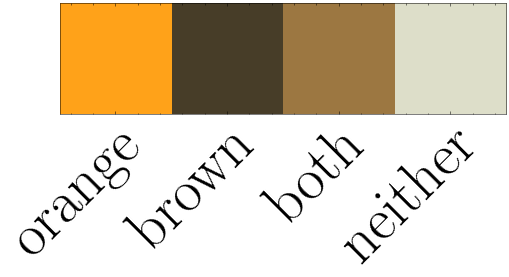

In [23]:
orange_marker_color = '#ffa219'
brown_marker_color = '#473d28'
both_marker_color = '#9c7741'
neither_marker_color = '#dddec9'
# orange, brown, both, neither
plot_colors = [orange_marker_color, brown_marker_color, both_marker_color, neither_marker_color]
color_list = [plot_colors[i] for i in data.loc[:,'ans']]

colors_as_vec = [mpl.colors.to_rgb(c) for c in plot_colors ]
fig, ax = plt.subplots(figsize=(8, 24))
img = ax.imshow(np.array([colors_as_vec]))
# plt.gca().set_xticklabels(['a', 'b', 'c', 'd'])
mpl.rcParams.update({'font.size': 60})
mpl.rcParams.update({'axes.labelsize': 60})
ax.set_xticklabels(['orange', 'brown', 'both', 'neither'])
plt.xticks(np.arange(0, 4, 1.0))
ax.get_yaxis().set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");
#ax.set_title("Figure color map");

In [7]:
#### Figure 1: RGB scatter plots, colored by answer
def scatter_matrix_plot(data_):
    plot_data = data_.rename(columns={'bg':'Background R,G \& B', 
                                     'circle_r': 'Circle R',
                                     'circle_g': 'Circle G',
                                     'circle_b': 'Circle B'})
    ax1 = pd.plotting.scatter_matrix(data_.loc[:, data.columns != 'ans'],
                              c=color_list,
                              figsize=[20,20],
                              diagonal=None,
                              alpha=0.7,
                              s=200,
                              marker='*')
    ax1[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
    #plt.suptitle('Figure 1. Matrix of Scatter Plots for All Color Columns (RGB), with Points Colored by Answer');
    # Why is the title so far away?
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    for i in range(np.shape(ax1)[0]):
        for j in range(np.shape(ax1)[1]):
            if i <= j:
                ax1[i,j].set_visible(False)
            else:
                ax1[i, j].tick_params(axis='both', which='major', labelsize=30)
                ax1[i, j].tick_params(axis='both', which='major', pad=10)
                ax1[i, j].xaxis.labelpad = 20
                ax1[i, j].yaxis.labelpad = 20
                ax1[i, j].xaxis.set_major_locator(MultipleLocator(0.5))
                ax1[i, j].yaxis.set_major_locator(MultipleLocator(0.5))
                ax1[i, j].set_xlim(0, 1.0)
                ax1[i, j].set_ylim(0, 1.0)
    plt.tight_layout()
scatter_matrix_plot(data)

RuntimeError: latex was not able to process the following string:
b'circle_g'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/app/.cache/matplotlib/tex.cache/5b9d17c314ee17a3578471578bbe8de2.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./5b9d17c314ee17a3578471578bbe8de2.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily circle_
                       g}
No pages of output.
Transcript written on 5b9d17c314ee17a3578471578bbe8de2.log.




RuntimeError: latex was not able to process the following string:
b'circle_g'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/app/.cache/matplotlib/tex.cache/5b9d17c314ee17a3578471578bbe8de2.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./5b9d17c314ee17a3578471578bbe8de2.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily circle_
                       g}
No pages of output.
Transcript written on 5b9d17c314ee17a3578471578bbe8de2.log.




<Figure size 1440x1440 with 16 Axes>

### Notes on figure 1
These results are similar to what we saw previously. 

Below we will plot the same data, transformed to HSV.

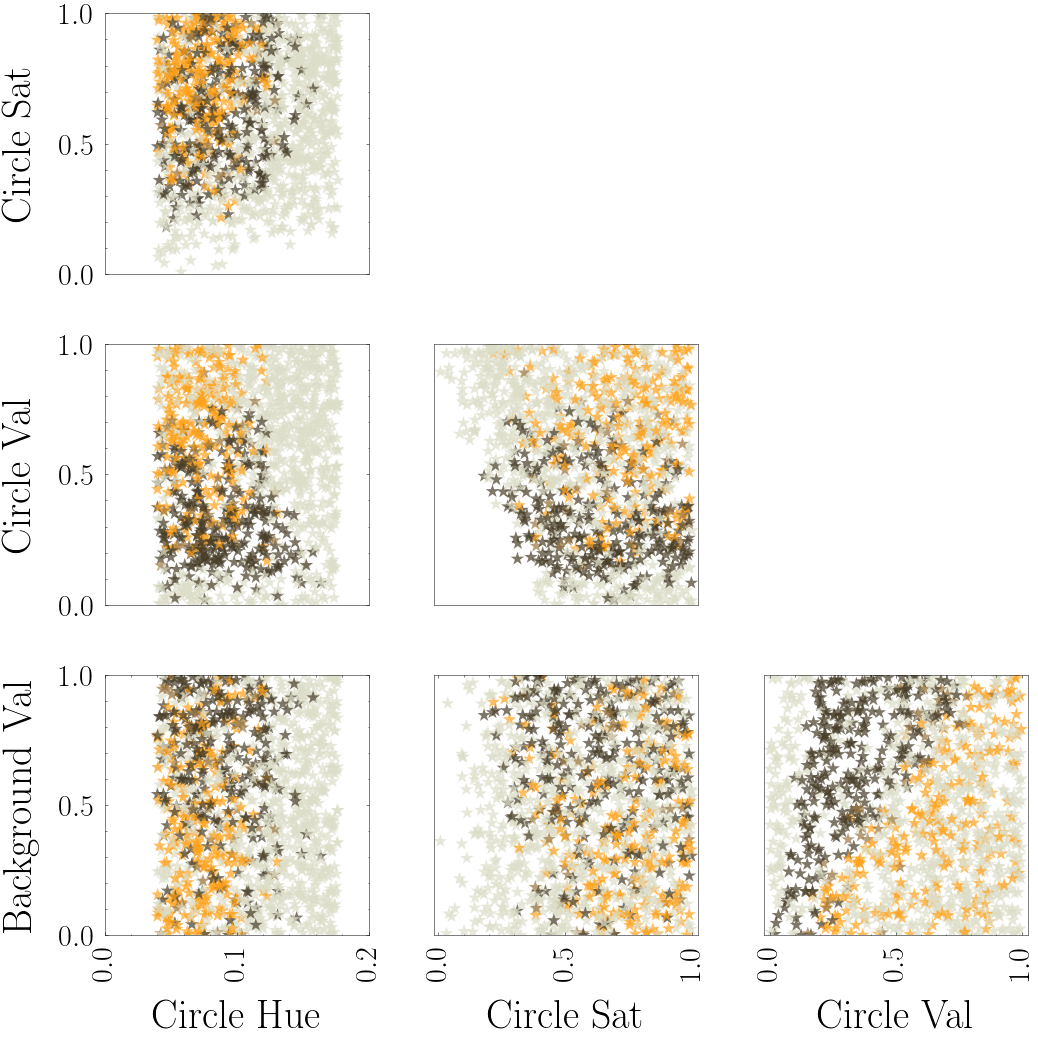

In [11]:
def to_hsv(d):
    d = pd.concat([pd.DataFrame([
        [row['ans'], *colorsys.rgb_to_hsv(row['circle_r'], row['circle_g'], row['circle_b']), 
         colorsys.rgb_to_hsv(*[row['bg'],]*3)[2]]],
        columns=['ans', 'Circle Hue', 'Circle Sat', 'Circle Val', 'Background Val'])
     for idx, row in d.iterrows()])
    return d

def scatter_matrix_plot_hsv():
    """Sadly, there are just enough differences to the previous figure that 
    I'm copying and editing it."""
    plot_data = to_hsv(data)
    ax1 = pd.plotting.scatter_matrix(plot_data.loc[:, data.columns != 'ans'],
                              c=color_list,
                              figsize=[20,20],
                              diagonal=None,
                              alpha=0.7,
                              s=200,
                              marker='*')
    ax1[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
    #plt.suptitle('Figure 1. Matrix of Scatter Plots for All Color Columns (RGB), with Points Colored by Answer');
    # Why is the title so far away?
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    for i in range(np.shape(ax1)[0]):
        for j in range(np.shape(ax1)[1]):
            if i <= j:
                ax1[i,j].set_visible(False)
            else:
                ax1[i, j].tick_params(axis='both', which='major', labelsize=30)
                ax1[i, j].tick_params(axis='both', which='major', pad=10)
                ax1[i, j].xaxis.labelpad = 20
                ax1[i, j].yaxis.labelpad = 20
                ax1[i, j].xaxis.set_major_locator(MultipleLocator(0.5))
                ax1[i, j].yaxis.set_major_locator(MultipleLocator(0.5))
                ax1[i, j].set_ylim(0, 1.0)
            # Special treatment for hue.
            if j == 0:
                ax1[i, j].set_xlim(0.0, 0.20)
                ax1[i, j].xaxis.set_major_locator(MultipleLocator(0.1))
    plt.tight_layout()
    #plt.savefig("./out/report/orange_brown_scatter_hsv.pdf", format="pdf", bbox_inches="tight")
scatter_matrix_plot_hsv()

In [ ]:
color_list = [plot_colors[i] for i in data.loc[:,'ans']]
ax2 = pd.plotting.scatter_matrix(data_hsv.loc[:, data_hsv.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
plt.suptitle('Figure 2. Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
ax2[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

### Notes on figure 2
This data is clearer than that from 1.1.1. It's much clearer here how the the circle brightness and background brightness define the difference between orange and brown.

### Remarks
Experiment 1.1.1 seems to capture the orange/brown phenomenon. Hopefully the data will be useful as a comparison. The circle val vs. background val scatter chart implies that a roughly linear boundary exists that separates the two colors. 

## Combined data
Below, the plots are repeated for the combined data from 1.1.1 and 1.1.2.

In [ ]:
data_combined = pd.read_csv('./resources/experiment_1_1_combined_edited.csv')
data_combined = data_combined[['ans', 'circle_r', 'circle_g', 'circle_b', 'bg_r']].rename(columns={'bg_r':'bg'})
color_list = [plot_colors[i] for i in data_combined.loc[:,'ans']]
data_combined_hsv = to_hsv(data_combined)
ax2 = pd.plotting.scatter_matrix(data_combined_hsv.drop('ans', axis=1),
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
plt.suptitle('Figure 2. Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
ax2[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

## Linear classifier
Below we train a classifier to distinguish between the orange and brown classes only. The below classifier achieves 96.7% accuracy on the training data.

In [ ]:
columns = ['circle hue', 'circle sat', 'circle val', 'bg val']
columns = ['circle_r', 'circle_g', 'circle_b', 'bg']

def as_Xy(data, class_0, class_1):
    all_classes = class_0 +  class_1
    filtered = data[data['ans'].isin(all_classes)]
    X = filtered[columns]
    y = filtered['ans']
    y = y.apply(lambda i : 0 if i in class_0 else 1)
    return X,y
    
def classify(data):
    print(f'data shape: {data.shape}')
    X, y = as_Xy(data, class_0=(0,1), class_1=(3,))
    model = sk.linear_model.LogisticRegression(solver='liblinear', class_weight='balanced')
    model.fit(X, y)
    v = model.coef_[0]
    b = model.intercept_
    print(f'v: {v}, b: {b}')
    y_predict = model.predict(X)
    accuracy = sk.metrics.accuracy_score(y, y_predict)
    print(f'Accuracy: {accuracy}')
    df = pd.concat([X,y], axis=1)
    df['predict'] = y_predict
    df['pval'] = np.abs(X @ v + b)
    #worst_data = df.sort_values('pval', ascending=False).iloc[0:20]
    worst_data = df[(df['pval']> 2.0) & (df['ans'] != df['predict'])]
    print(f'Worst data:\n {worst_data}')
    #good_data = df.sort_values('pval', ascending=False).iloc[1:]
    # df['correct'] = df['ans'] != df['predict']
    #good_data = df[(df['pval']< 0.7) | (df['correct'] == 0.0)]
    df = df[df['ans'] != df['predict']]
    color_list = [plot_colors[i] for i in df.loc[:,'ans']]
    df = df.drop(['ans', 'predict'], axis=1)
    ax = pd.plotting.scatter_matrix(df,
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
    plt.suptitle('Figure 2. Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
    ax[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
classify(data_combined)
worst_data =[]